In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from data import read_preprocessed_data, remove_outliers, outliers_statistics

df = read_preprocessed_data(std=False, outliers=False)

c:\dadada4\Mad\customer-profile-analysis\data/marketing_campaign.csv


In [2]:
outliers_statistics(df).head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent
Ilość wartości skrajnych,0.0,0.0,8.00000,0.0,0.0,0.0,35.000000,246.000000,174.00000,222.000000,...,8.00000,163.000000,164.000000,162.000000,142.000000,30.000000,21.000000,333.000000,3.000000,3.000000
Procent wartości skrajnych,0.0,0.0,0.00361,0.0,0.0,0.0,0.015794,0.111011,0.07852,0.100181,...,0.00361,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,0.150271,0.001354,0.001354


In [3]:

incl= ['mean','std']
stat_cols = [col for col in df.columns if df[col].nunique()>9]
print(stat_cols)
for col in df.columns:
    if(col not in stat_cols):
        print(col)



['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Age', 'Spent']
Education
Marital_Status
Kidhome
Teenhome
AcceptedCmp3
AcceptedCmp4
AcceptedCmp5
AcceptedCmp1
AcceptedCmp2
Complain
Response


In [4]:
num_cols = pd.DataFrame(df,columns= stat_cols)#df.select_dtypes(include=['int', 'float'])
statystyki = {
'Średnia':num_cols.mean(),
'Mediana':num_cols.median(),
'Minimum':num_cols.min(),
'Maksimum':num_cols.max(),
'Odchylenie Standardowe':num_cols.std(),
'Skośność':num_cols.skew()
}
#statystyki = pd.DataFrame(statystyki).transpose()

In [5]:

other_cols = [col for col in df.columns if col not in stat_cols]

print(other_cols)

['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']


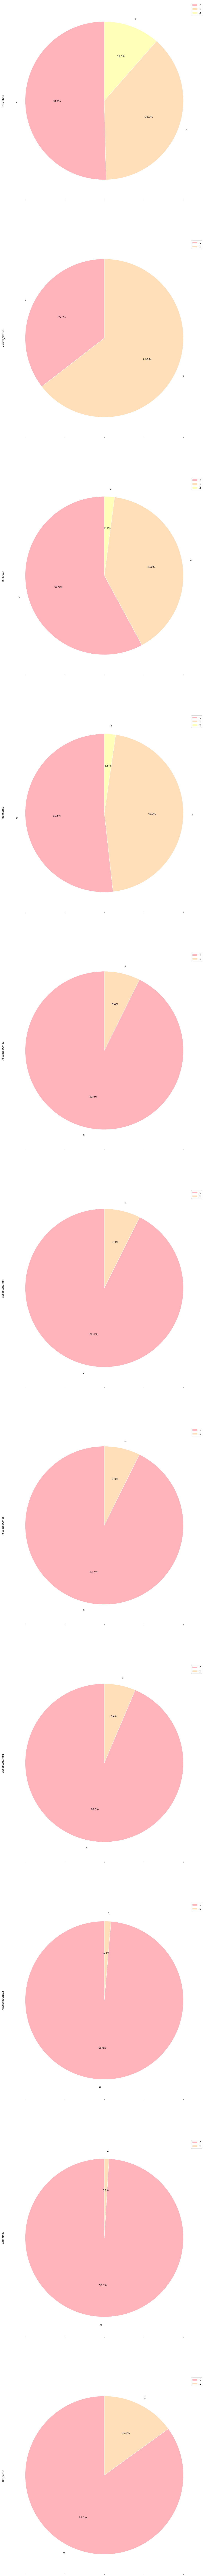

In [6]:
color_pallette = [
    '#FFB3BA',  # Pastel Pink  
    '#FFDFBA',  # Pastel Orange  
    '#FFFFBA',  # Pastel Yellow  
    '#BAFFC9',  # Pastel Green  
    '#BAE1FF',  # Pastel Blue  
    '#D4A5FF',  # Pastel Purple  
    '#FFC3A0',  # Pastel Peach  
    '#A0E8FF',  # Pastel Sky Blue  
    '#B5EAD7',  # Pastel Mint  
    '#F8C8DC',  # Pastel Rose  
]


ax = (
    df[other_cols]
    .astype(str)
    .apply(lambda x: x.value_counts())
    .plot(
        kind="pie",
        subplots=True,
        figsize=(15, 200),
        #the charts have to be so large and split apart because otherwise some percentages and/or legends overlap
        layout=(12,1),
        colors=color_pallette,
        autopct=lambda p: f'{p:.1f}%' if p > 0 else '',
        startangle=90,
        wedgeprops={'edgecolor': 'white'},
    )
)




 



#plt.tight_layout()
plt.show()

In [7]:
statystyki = pd.DataFrame(statystyki).transpose()

statystyki.head(n=6)

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Spent
Średnia,52247.251354,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,52.179603,607.075361
Mediana,51381.500000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,51.000000,396.500000
Minimum,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,5.000000
Maksimum,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,128.000000,2525.000000
Odchylenie Standardowe,25173.076661,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,11.985554,602.900476
Skośność,6.763487,0.001648,1.170720,2.101658,2.025577,1.916369,2.103328,1.839231,2.415272,1.197037,1.881075,0.701826,0.218043,0.353661,0.858055
